In [1]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, ReLU, Dropout, Flatten
from keras.models import Model
from keras import backend as K
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
x_train = (x_train - 0.286)/0.353
x_test = (x_test - 0.286)/0.353

In [18]:
x_train.shape

(60000, 28, 28, 1)

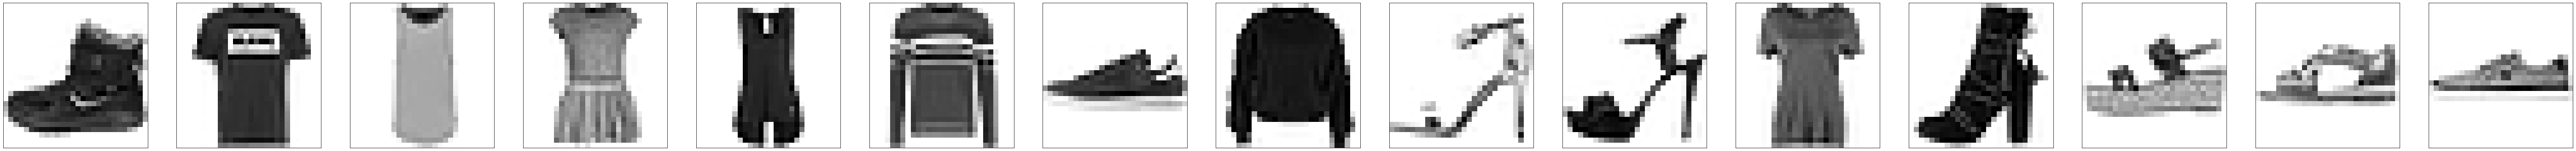

In [18]:
n = 15
plt.figure(figsize=(100, 100))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [7]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [61]:
x_train.shape

(60000, 28, 28, 1)

In [19]:
inp = Input(shape=(28,28,1))
x = Conv2D(64, (3, 3), padding='same')(inp)
x = ReLU()(x)
x = BatchNormalization()(x)
#x = MaxPooling2D((2, 2), strides=2)(x)
x = Dropout(0.5)(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=2)(x)
x = Dropout(0.5)(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=2)(x)
x = Dropout(0.5)(x)

f = Flatten()(x)
x = Dense(500,use_bias=False)(f)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.5)(x)

en = Dense(10, activation="softmax")(x)

In [20]:
mod = Model(inp, en)
mod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
re_lu_21 (ReLU)              (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_21 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
re_lu_22 (ReLU)              (None, 28, 28, 64)        0         
__________

In [21]:
mod.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
early_stopper = keras.callbacks.EarlyStopping(monitor='val_acc', 
                                              min_delta=0.001, 
                                              patience=10, 
                                              verbose=1, 
                                              mode='auto', 
                                              restore_best_weights=True)


ModelCheckpoint = keras.callbacks.ModelCheckpoint('./fm_cnn_BN.h5',
                                                  monitor='val_acc', 
                                                  save_best_only=True, 
                                                  mode='max',
                                                  verbose=1)
history = mod.fit(x_train, y_train,
                  epochs=300,
                  batch_size=64,
                  shuffle=True,
                  validation_data=(x_test, y_test),
                  callbacks=[early_stopper, ModelCheckpoint]
                  )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 634s 11ms/step - loss: 0.5317 - acc: 0.8062 - val_loss: 0.3612 - val_acc: 0.8670

Epoch 00001: val_acc improved from -inf to 0.86700, saving model to ./fm_cnn_BN.h5
Epoch 2/300
60000/60000 [==============================] - 659s 11ms/step - loss: 0.3575 - acc: 0.8692 - val_loss: 0.2831 - val_acc: 0.8969

Epoch 00002: val_acc improved from 0.86700 to 0.89690, saving model to ./fm_cnn_BN.h5
Epoch 3/300
60000/60000 [==============================] - 658s 11ms/step - loss: 0.3124 - acc: 0.8846 - val_loss: 0.2713 - val_acc: 0.8990

Epoch 00003: val_acc improved from 0.89690 to 0.89900, saving model to ./fm_cnn_BN.h5
Epoch 4/300
60000/60000 [==============================] - 664s 11ms/step - loss: 0.2843 - acc: 0.8965 - val_loss: 0.2720 - val_acc: 0.9010

Epoch 00004: val_acc improved from 0.89900 to 0.90100, saving model to ./fm_cnn_BN.

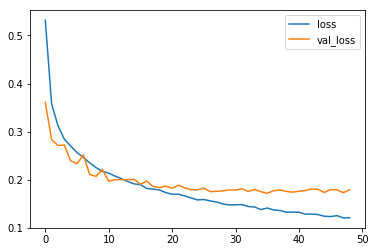

In [23]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

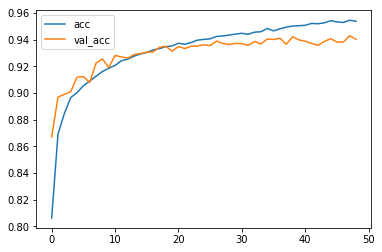

In [24]:
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()